In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [5]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
tf.keras.utils.get_file('flower_photos.tgz', origin=dataset_url, cache_dir='.', extract=True)


228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 48s 0us/step


'./datasets/flower_photos_extracted'

In [12]:
data_dir = './datasets/flower_photos/'

In [13]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [14]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [23]:
roeses = list(data_dir.glob('roses/*'))
roeses[:5]

[PosixPath('datasets/flower_photos/roses/2409069862_b128ee2a71.jpg'),
 PosixPath('datasets/flower_photos/roses/5892908233_6756199a43.jpg'),
 PosixPath('datasets/flower_photos/roses/14381787252_e8e12e277a_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15255964454_0a64eb67fa.jpg'),
 PosixPath('datasets/flower_photos/roses/2364976562_a184463083_m.jpg')]

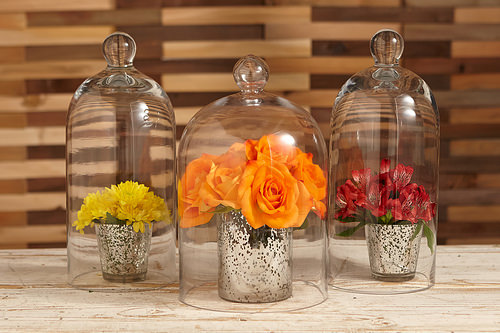

In [39]:
PIL.Image.open(str(roeses[3]))

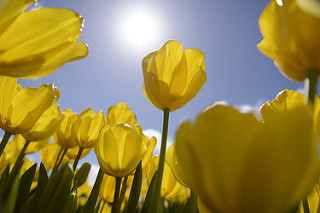

In [26]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[3]))

In [27]:
flowr_image_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'tulips': list(data_dir.glob('tulips/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'dandelion': list(data_dir.glob('dandelion/*'))
    
}



In [28]:
flowr_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4
}

In [29]:
flowr_image_dict['roses'][0]

PosixPath('datasets/flower_photos/roses/2409069862_b128ee2a71.jpg')

In [32]:
img=cv2.imread(flowr_image_dict['roses'][0])
img.shape


(333, 500, 3)

In [33]:
# resizing
img=cv2.resize(img,(180,180))

In [41]:
X,y=[],[]
for flower_type, images in flowr_image_dict.items():
    #print(flower_type, len(images))
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowr_labels_dict[flower_type])

In [47]:

X=np.array(X)
y=np.array(y)

In [54]:
X[:5]

array([[[[134, 142, 155],
         [138, 146, 156],
         [143, 153, 159],
         ...,
         [ 31,  46,  63],
         [ 31,  45,  63],
         [ 31,  46,  62]],

        [[128, 137, 150],
         [137, 147, 157],
         [143, 153, 161],
         ...,
         [ 32,  46,  64],
         [ 31,  45,  66],
         [ 27,  45,  64]],

        [[127, 138, 152],
         [135, 146, 157],
         [144, 154, 163],
         ...,
         [ 31,  45,  63],
         [ 34,  48,  63],
         [ 33,  47,  62]],

        ...,

        [[137, 142, 141],
         [137, 142, 141],
         [132, 138, 137],
         ...,
         [  0,  10,  35],
         [  0,   9,  26],
         [  2,  10,  34]],

        [[135, 140, 140],
         [133, 138, 138],
         [131, 135, 136],
         ...,
         [  1,  10,  36],
         [  1,  10,  26],
         [  3,  10,  35]],

        [[132, 136, 137],
         [130, 134, 135],
         [130, 134, 135],
         ...,
         [  0,  10,  36],
        

In [55]:
y[:5]

array([0, 0, 0, 0, 0])

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [57]:
X_train.shape

(2752, 180, 180, 3)

In [58]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [59]:
X_train_scaled[0]

array([[[0.13333333, 0.36862745, 0.24313725],
        [0.13333333, 0.36078431, 0.25098039],
        [0.12156863, 0.34509804, 0.24705882],
        ...,
        [0.09019608, 0.19215686, 0.1372549 ],
        [0.07058824, 0.18039216, 0.12156863],
        [0.08235294, 0.19607843, 0.1372549 ]],

       [[0.1372549 , 0.34117647, 0.26666667],
        [0.1372549 , 0.34901961, 0.24705882],
        [0.14117647, 0.36078431, 0.23921569],
        ...,
        [0.0745098 , 0.17647059, 0.12156863],
        [0.07843137, 0.19607843, 0.1372549 ],
        [0.0745098 , 0.20784314, 0.14901961]],

       [[0.12941176, 0.32156863, 0.25882353],
        [0.13333333, 0.3372549 , 0.24705882],
        [0.11372549, 0.32156863, 0.21176471],
        ...,
        [0.08235294, 0.18431373, 0.13333333],
        [0.07058824, 0.2       , 0.1372549 ],
        [0.0627451 , 0.21176471, 0.14901961]],

       ...,

       [[0.92941176, 0.96470588, 0.96470588],
        [0.9254902 , 0.95294118, 0.95686275],
        [0.94901961, 0

In [62]:
number_of_classes = 5

model = Sequential([
    layers.Conv2D(16, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    #layers.Dense(5, activation='softmax')
    layers.Dense(number_of_classes, activation='softmax')
])

model.compile(optimizer= 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=10)

W0000 00:00:1736478475.744684  213299 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2025-01-10 08:38:00.186237: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1069977600 exceeds 10% of free system memory.


Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 229ms/step - accuracy: 0.3262 - loss: 1.7287
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 224ms/step - accuracy: 0.5812 - loss: 1.0701
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 226ms/step - accuracy: 0.6718 - loss: 0.9046
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 227ms/step - accuracy: 0.7503 - loss: 0.6898
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 224ms/step - accuracy: 0.8225 - loss: 0.5056
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 225ms/step - accuracy: 0.8823 - loss: 0.3394
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 227ms/step - accuracy: 0.9289 - loss: 0.2185
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 226ms/step - accuracy: 0.9692 - loss: 0.1232
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 226ms/step - accuracy: 0.9774 - loss: 0.0845
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 227ms/step - accuracy: 0.9931 - loss: 0.0355


In [63]:
model.evaluate(X_test_scaled, y_test)

2025-01-10 09:51:01.119805: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 356918400 exceeds 10% of free system memory.


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.6117 - loss: 2.1391


[2.189758062362671, 0.5969498753547668]

In [64]:
predicton = model.predict(X_test_scaled)

 1/29 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step

2025-01-10 09:52:06.190096: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 356918400 exceeds 10% of free system memory.


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


In [68]:
score = tf.nn.softmax(predicton[5])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.15977503, 0.15594575, 0.16480769, 0.3623148 , 0.15715666],
      dtype=float32)>

In [69]:
np.argmax(score)

np.int64(3)

In [70]:
y_test[5]


np.int64(3)

In [91]:


data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomZoom(0.9),
    tf.keras.layers.RandomContrast(0.9),
    tf.keras.layers.RandomRotation(0.9),
])


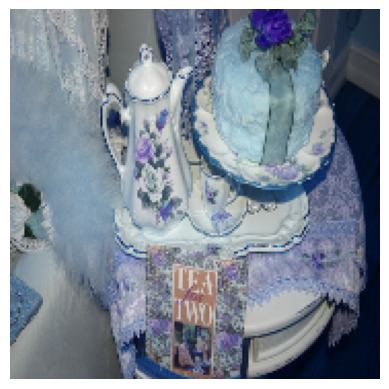

In [74]:
plt.axis('off')
plt.imshow(X[0])


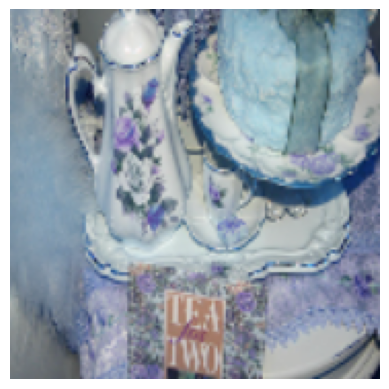

In [84]:
plt.axis('off')
plt.imshow(data_augmentation(X[0]).numpy().astype('uint8'))


In [87]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.9),
])

In [95]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('vertical'),
])

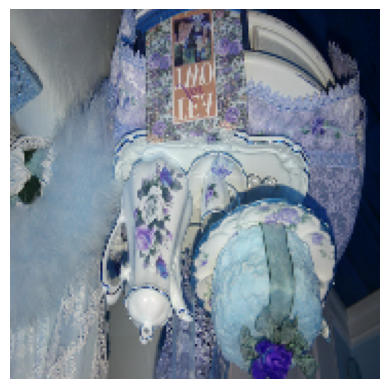

In [96]:
plt.axis('off')
plt.imshow(data_augmentation(X[0]).numpy().astype('uint8'))


In [92]:
number_of_classes = 5

model = Sequential([
    data_augmentation,
    layers.Conv2D(16, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    #layers.Dense(5, activation='softmax')
    layers.Dense(number_of_classes, activation='softmax')
])

model.compile(optimizer= 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=10)

2025-01-10 10:25:19.792211: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1069977600 exceeds 10% of free system memory.


Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 24s 255ms/step - accuracy: 0.2756 - loss: 1.7608
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 250ms/step - accuracy: 0.4883 - loss: 1.2227
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 255ms/step - accuracy: 0.5542 - loss: 1.1030
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 254ms/step - accuracy: 0.5426 - loss: 1.0891
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 255ms/step - accuracy: 0.5964 - loss: 1.0491
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 255ms/step - accuracy: 0.5843 - loss: 1.0371
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 253ms/step - accuracy: 0.6012 - loss: 0.9779
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 253ms/step - accuracy: 0.6393 - loss: 0.9307
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 252ms/step - accuracy: 0.6242 - loss: 0.9512
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 258ms/step - accuracy: 0.6471 - loss: 0.9359


In [97]:
model.evaluate(X_test_scaled, y_test)

2025-01-10 17:37:53.239654: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 356918400 exceeds 10% of free system memory.


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.5951 - loss: 1.0126


[0.9822458624839783, 0.6023964881896973]